<a href="https://colab.research.google.com/github/galaxy-kim/Python_note_backup/blob/main/06_jan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##그리드서치 복습

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsRegressor

In [ ]:
df=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/ubion_given_data/Ashopping (1).csv",encoding="cp949")
df

,고객ID,이탈여부,총매출액,구매금액대,방문빈도,1회 평균매출액,할인권 사용 횟수,총 할인 금액,고객등급,구매유형,...,구매카테고리수,거주지역,성별,고객 나이대,거래기간,할인민감여부,Recency,Frequency,Monetary,평균 구매주기
0,1,1,4963160,1,22,225598,1,5445,1,3,...,7,6,1,6,3303,0,3,2,1,149.136364
1,2,1,2271520,0,38,59777,22,350995,1,1,...,5,4,0,2,3129,0,5,3,4,81.342105
2,3,1,2484250,0,2,1242125,6,186045,1,2,...,4,6,0,3,3636,0,4,1,4,1817.000000
3,4,1,2778850,0,9,308761,1,5195,2,4,...,4,5,0,4,3637,0,7,4,6,403.111111
4,5,1,4437610,1,10,443761,9,246350,2,4,...,6,6,0,4,3638,0,5,1,4,362.800000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,0,12731560,2,35,363759,3,44445,2,3,...,8,6,0,4,4629,1,3,3,1,131.257143
996,997,0,3419010,0,6,569835,6,186545,1,2,...,9,6,0,4,4630,1,7,3,6,770.666667
997,998,0,4612100,1,13,354777,8,260700,2,1,...,1,4,1,6,4631,1,2,1,2,355.230769
998,999,0,5165360,1,28,184477,20,347700,1,3,...,7,5,1,6,3907,0,7,2,6,138.535714


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   고객ID       1000 non-null   int64  
 1   이탈여부       1000 non-null   int64  
 2   총매출액       1000 non-null   int64  
 3   구매금액대      1000 non-null   int64  
 4   방문빈도       1000 non-null   int64  
 5   1회 평균매출액   1000 non-null   int64  
 6   할인권 사용 횟수  1000 non-null   int64  
 7   총 할인 금액    1000 non-null   int64  
 8   고객등급       1000 non-null   int64  
 9   구매유형       1000 non-null   int64  
 10  클레임접수여부    1000 non-null   int64  
 11  구매카테고리수    1000 non-null   int64  
 12  거주지역       1000 non-null   int64  
 13  성별         1000 non-null   int64  
 14  고객 나이대     1000 non-null   int64  
 15  거래기간       1000 non-null   int64  
 16  할인민감여부     1000 non-null   int64  
 17  Recency    1000 non-null   int64  
 18  Frequency  1000 non-null   int64  
 19  Monetary   1000 non-null   int64  
 20  평균 구매주기  

In [ ]:
df.isnull().sum()

고객ID         0
이탈여부         0
총매출액         0
구매금액대        0
방문빈도         0
1회 평균매출액     0
할인권 사용 횟수    0
총 할인 금액      0
고객등급         0
구매유형         0
클레임접수여부      0
구매카테고리수      0
거주지역         0
성별           0
고객 나이대       0
거래기간         0
할인민감여부       0
Recency      0
Frequency    0
Monetary     0
평균 구매주기      0
dtype: int64

In [ ]:
#필요한 열(변수,feature) 뽑아 데이터 만들기
X=df[["총매출액","1회 평균매출액","할인권 사용 횟수"]]
Y=df["평균 구매주기"]

#데이터 분할(train,test)
X_train, X_test, Y_train, Y_test=train_test_split(X,Y,test_size=0.3,random_state=0)

#model 만들기
model=KNeighborsRegressor()

#교차검증
score=cross_val_score(model,X_train,Y_train,cv=10)
print("CV SCORE : ",score)

CV SCORE :  [0.71641358 0.55975791 0.76634495 0.58696302 0.60491788 0.64888287
 0.73366212 0.53759107 0.74664738 0.79547413]


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import StratifiedKFold

#필요한 열(변수,feature) 뽑아 데이터 만들기
X=df[["총매출액","거래기간","방문빈도"]]
Y=df["이탈여부"]

#데이터 분할(train,test)
X_train, X_test, Y_train, Y_test=train_test_split(X,Y,test_size=0.3,random_state=0)

#모형생성
model=KNeighborsClassifier()

#검증(Stratified K-fold Cross-Validation test)
skf=StratifiedKFold(n_splits=5,shuffle=True,random_state=0)
scores=cross_val_score(model,X_train,Y_train,cv=skf)
print("교차검증 점수 : ",scores)

교차검증 점수 :  [0.64285714 0.7        0.67857143 0.67142857 0.70714286]


In [ ]:
from sklearn.model_selection import GridSearchCV

#필요한 열(변수,feature) 뽑아 데이터 만들기
X=df[["총매출액","거래기간","방문빈도"]]
Y=df["이탈여부"]

#데이터 분할(train,test)
X_train, X_test, Y_train, Y_test=train_test_split(X,Y,test_size=0.3,random_state=0)

#모형생성
model=KNeighborsClassifier()

#그리드 인자 검색
mylist=list(range(1,50))
k_list=[x for x in mylist if x%2!=0]
parameter_grid={"n_neighbors":k_list}

#그리드 서치
grid_search=GridSearchCV(model,parameter_grid,cv=10)
grid_search.fit(X_train,Y_train)

grid_search.best_params_

{'n_neighbors': 9}

In [ ]:
grid_search.cv_results_

{'mean_fit_time': array([0.00200856, 0.00189192, 0.0018707 , 0.00187321, 0.00216804,
        0.00231025, 0.00198879, 0.0022584 , 0.00188625, 0.00200198,
        0.00190868, 0.00183764, 0.00183353, 0.00184462, 0.00184112,
        0.00184116, 0.00190439, 0.00186906, 0.00232153, 0.00185921,
        0.00194745, 0.00189795, 0.00187786, 0.00185835, 0.00219457]),
 'std_fit_time': array([2.19583725e-04, 7.23027328e-05, 4.75064858e-05, 8.09372470e-05,
        5.86449779e-04, 5.31473533e-04, 3.48138450e-04, 3.94838547e-04,
        7.58811280e-05, 2.99989877e-04, 6.20595089e-05, 2.82364912e-05,
        2.61735825e-05, 7.10322894e-05, 3.72204620e-05, 2.56769615e-05,
        1.18676291e-04, 3.25035796e-05, 6.44074011e-04, 6.91637833e-05,
        2.63589629e-04, 1.07944401e-04, 5.10241439e-05, 2.95541443e-05,
        4.34305080e-04]),
 'mean_score_time': array([0.003583  , 0.00330801, 0.00358701, 0.00331166, 0.00398209,
        0.00424051, 0.00378304, 0.00408428, 0.00345714, 0.00366683,
        0.00

In [ ]:
grid_search.best_estimator_

KNeighborsClassifier(n_neighbors=9)

In [ ]:
from sklearn.metrics import accuracy_score
be=grid_search.best_estimator_
pred=be.predict(X_test)
accuracy_score(Y_test,pred)

0.6433333333333333

In [ ]:
from sklearn.model_selection import GridSearchCV

#필요한 열(변수,feature) 뽑아 데이터 만들기
X=df[["총매출액","거래기간","방문빈도"]]
Y=df["이탈여부"]

#데이터 분할(train,test)
X_train, X_test, Y_train, Y_test=train_test_split(X,Y,test_size=0.3,random_state=0)

#모형생성
model=KNeighborsClassifier()

#그리드 인자 검색
mylist=list(range(1,50))
k_list=[x for x in mylist if x%2!=0]
parameter_grid={"n_neighbors":k_list}

#그리드 서치
grid_search=GridSearchCV(model,parameter_grid,cv=15)
grid_search.fit(X_train,Y_train)

grid_search.best_params_
grid_search.cv_results_

{'mean_fit_time': array([0.00214961, 0.00189398, 0.00223889, 0.00185215, 0.00183285,
        0.00188526, 0.00184433, 0.00194705, 0.00204973, 0.00206   ,
        0.00201713, 0.00218477, 0.00201546, 0.00185989, 0.00184822,
        0.0062041 , 0.00273225, 0.00275729, 0.00287652, 0.00335693,
        0.00561339, 0.00492474, 0.00362644, 0.00328209, 0.00350062]),
 'std_fit_time': array([5.29504708e-04, 5.17793682e-05, 5.21961193e-04, 3.80404163e-05,
        2.10829739e-05, 7.12341979e-05, 5.80415927e-05, 2.31481070e-04,
        4.20808753e-04, 2.28020891e-04, 2.44552308e-04, 3.61521409e-04,
        2.38557455e-04, 6.67096983e-05, 5.08765361e-05, 4.32007248e-03,
        5.18584352e-04, 3.55998050e-04, 2.24780416e-04, 1.23465130e-03,
        5.33108840e-03, 3.70946956e-03, 1.48691381e-03, 4.84524280e-04,
        1.66913234e-03]),
 'mean_score_time': array([0.00303899, 0.00281533, 0.0033219 , 0.00283685, 0.00279255,
        0.00287439, 0.00285678, 0.0028605 , 0.00324794, 0.00308712,
        0.00

In [ ]:
#cv를 바꾸면 best estimator도 바뀐다다
grid_search.best_estimator_

KNeighborsClassifier(n_neighbors=25)

In [ ]:
#accuracy score도 달라짐
from sklearn.metrics import accuracy_score
be=grid_search.best_estimator_
pred=be.predict(X_test)
print("예측 정확도 : ",accuracy_score(Y_test,pred))

예측 정확도 :  0.6866666666666666


##변수 선택

In [ ]:
df.columns

Index(['고객ID', '이탈여부', '총매출액', '구매금액대', '방문빈도', '1회 평균매출액', '할인권 사용 횟수',
       '총 할인 금액', '고객등급', '구매유형', '클레임접수여부', '구매카테고리수', '거주지역', '성별', '고객 나이대',
       '거래기간', '할인민감여부', 'Recency', 'Frequency', 'Monetary', '평균 구매주기'],
      dtype='object')

In [ ]:
from sklearn.feature_selection import SelectKBest,chi2

#데이터 지정(변수)
X=df.drop(["고객ID","이탈여부"],axis=1)
Y=df["이탈여부"]

#데이터 분할
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=0)

#일변량 통계기반 변수 선택
selector=SelectKBest()
selector.fit(X_train,Y_train)

score=pd.DataFrame()
score["Chi2"]=selector.scores_
score["p-value"]=selector.pvalues_
score["support"]=selector.get_support()
score["attribute"]=X_train.columns
score[score["support"]==True]

,Chi2,p-value,support,attribute
0,11.220487,8.525018e-04,True,총매출액
1,21.391230,4.462997e-06,True,구매금액대
2,40.530259,3.508018e-10,True,방문빈도
3,31.867994,2.401115e-08,True,1회 평균매출액
8,6.784768,9.389630e-03,True,클레임접수여부
11,12.171897,5.156069e-04,True,성별
13,60.680197,2.435210e-14,True,거래기간
14,86.354376,1.882930e-19,True,할인민감여부
16,6.449529,1.131399e-02,True,Frequency
18,40.217271,4.081567e-10,True,평균 구매주기


In [ ]:
#모형기반 선택

from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier

selector=SelectFromModel(RandomForestClassifier(n_estimators=100,random_state=0),threshold="median")
selector.fit(X_train,Y_train)

score=pd.DataFrame()
score["attribute"]=X_train.columns
score["support"]=selector.get_support()
score[score["support"]==True]

,attribute,support
0,총매출액,True
2,방문빈도,True
3,1회 평균매출액,True
4,할인권 사용 횟수,True
5,총 할인 금액,True
10,거주지역,True
12,고객 나이대,True
13,거래기간,True
14,할인민감여부,True
18,평균 구매주기,True


##데이터 밸런싱
###(오버 샘플링, 언더 샘플링)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   고객ID       1000 non-null   int64  
 1   이탈여부       1000 non-null   int64  
 2   총매출액       1000 non-null   int64  
 3   구매금액대      1000 non-null   int64  
 4   방문빈도       1000 non-null   int64  
 5   1회 평균매출액   1000 non-null   int64  
 6   할인권 사용 횟수  1000 non-null   int64  
 7   총 할인 금액    1000 non-null   int64  
 8   고객등급       1000 non-null   int64  
 9   구매유형       1000 non-null   int64  
 10  클레임접수여부    1000 non-null   int64  
 11  구매카테고리수    1000 non-null   int64  
 12  거주지역       1000 non-null   int64  
 13  성별         1000 non-null   int64  
 14  고객 나이대     1000 non-null   int64  
 15  거래기간       1000 non-null   int64  
 16  할인민감여부     1000 non-null   int64  
 17  Recency    1000 non-null   int64  
 18  Frequency  1000 non-null   int64  
 19  Monetary   1000 non-null   int64  
 20  평균 구매주기  

In [ ]:
df.describe()

,고객ID,이탈여부,총매출액,구매금액대,방문빈도,1회 평균매출액,할인권 사용 횟수,총 할인 금액,고객등급,구매유형,...,구매카테고리수,거주지역,성별,고객 나이대,거래기간,할인민감여부,Recency,Frequency,Monetary,평균 구매주기
count,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.00000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,500.500000,0.300000,5.858013e+06,0.700000,22.91100,3.521024e+05,16.027000,292371.670000,1.546000,2.656000,...,5.217000,5.147000,0.189000,3.964000,3495.891000,0.400000,4.925000,2.289000,4.129000,266.880824
std,288.819436,0.458487,5.812815e+06,0.781416,19.08217,3.124636e+05,8.341334,111937.501042,0.498129,1.046307,...,2.224153,1.169084,0.391705,1.078827,965.966194,0.490143,1.744253,1.669811,1.560383,254.077398
min,1.000000,0.000000,1.886100e+06,0.000000,1.00000,2.708200e+04,1.000000,3750.000000,1.000000,1.000000,...,1.000000,1.000000,0.000000,2.000000,827.000000,0.000000,1.000000,1.000000,1.000000,13.980645
25%,250.750000,0.000000,2.815905e+06,0.000000,10.75000,1.631242e+05,9.000000,261686.250000,1.000000,2.000000,...,3.000000,4.000000,0.000000,3.000000,2871.000000,0.000000,4.000000,1.000000,3.000000,111.957671
50%,500.500000,0.000000,4.092145e+06,0.500000,18.00000,2.582080e+05,17.000000,347500.000000,2.000000,2.000000,...,5.000000,5.000000,0.000000,4.000000,3836.000000,0.000000,5.000000,2.000000,4.000000,191.469697
75%,750.250000,1.000000,6.545392e+06,1.000000,28.00000,4.268310e+05,23.000000,365400.000000,2.000000,4.000000,...,7.000000,6.000000,0.000000,5.000000,4207.250000,1.000000,7.000000,3.000000,6.000000,324.386218
max,1000.000000,1.000000,6.759576e+07,2.000000,155.00000,2.798500e+06,30.000000,400600.000000,2.000000,4.000000,...,9.000000,7.000000,1.000000,7.000000,5334.000000,1.000000,7.000000,7.000000,7.000000,1956.000000


In [ ]:
#under-sampling

from imblearn.under_sampling import RandomUnderSampler
from collections import Counter

X_train_under,Y_train_under=RandomUnderSampler(random_state=0).fit_resample(X_train,Y_train)

#원데이터와 비교해 언더샘플링 확인
print("original data %s"%Counter(Y))
print("original train data %s"%Counter(Y_train))
print("under train data %s"%Counter(Y_train_under))

original data Counter({0: 700, 1: 300})
original train data Counter({0: 481, 1: 219})
under train data Counter({0: 219, 1: 219})


In [ ]:
#over-sampling

from imblearn.over_sampling import SMOTE #synthetic minority over-sampling techniques

X_train_over,Y_train_over=SMOTE(random_state=0).fit_resample(X_train,Y_train)

#원데이터와 비교해 오버샘플링 확인
print("original data %s"%Counter(Y))
print("original train data %s"%Counter(Y_train))
print("over train data %s"%Counter(Y_train_over))

original data Counter({0: 700, 1: 300})
original train data Counter({0: 481, 1: 219})
over train data Counter({1: 481, 0: 481})


In [ ]:
#Y="이탈여부"→"성별" (원데이터가 {0:700,1:300}으로 나왔왔던 건 우연의 일치)
X=df.drop(["고객ID","성별"],axis=1)
Y=df["성별"]

#데이터 분할
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=0)

#under-sampling
X_train_under,Y_train_under=RandomUnderSampler(random_state=0).fit_resample(X_train,Y_train)

#원데이터와 비교해 언더샘플링 확인
print("original data %s"%Counter(Y))
print("original train data %s"%Counter(Y_train))
print("under train data %s"%Counter(Y_train_under))

#over-sampling
X_train_over,Y_train_over=SMOTE(random_state=0).fit_resample(X_train,Y_train)

#원데이터와 비교해 오버샘플링 확인
print("original data %s"%Counter(Y))
print("original train data %s"%Counter(Y_train))
print("over train data %s"%Counter(Y_train_over))

original data Counter({0: 811, 1: 189})
original train data Counter({0: 565, 1: 135})
under train data Counter({0: 135, 1: 135})
original data Counter({0: 811, 1: 189})
original train data Counter({0: 565, 1: 135})
over train data Counter({0: 565, 1: 565})


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   고객ID       1000 non-null   int64  
 1   이탈여부       1000 non-null   int64  
 2   총매출액       1000 non-null   int64  
 3   구매금액대      1000 non-null   int64  
 4   방문빈도       1000 non-null   int64  
 5   1회 평균매출액   1000 non-null   int64  
 6   할인권 사용 횟수  1000 non-null   int64  
 7   총 할인 금액    1000 non-null   int64  
 8   고객등급       1000 non-null   int64  
 9   구매유형       1000 non-null   int64  
 10  클레임접수여부    1000 non-null   int64  
 11  구매카테고리수    1000 non-null   int64  
 12  거주지역       1000 non-null   int64  
 13  성별         1000 non-null   int64  
 14  고객 나이대     1000 non-null   int64  
 15  거래기간       1000 non-null   int64  
 16  할인민감여부     1000 non-null   int64  
 17  Recency    1000 non-null   int64  
 18  Frequency  1000 non-null   int64  
 19  Monetary   1000 non-null   int64  
 20  평균 구매주기  

##선형 회귀분석

In [ ]:
import seaborn as sns
import numpy as np

In [ ]:
df["평균 구매주기"].describe()

count    1000.000000
mean      266.880824
std       254.077398
min        13.980645
25%       111.957671
50%       191.469697
75%       324.386218
max      1956.000000
Name: 평균 구매주기, dtype: float64

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54217 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44512 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44396 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47588 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51452 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44592 missing from current font.
  font.set_

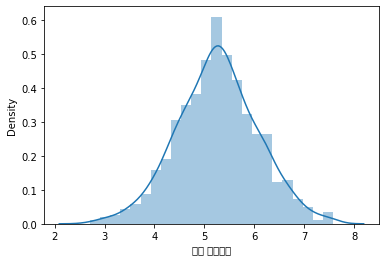

In [ ]:
df["평균 구매주기"]=np.log1p(df["평균 구매주기"])
sns.distplot(df["평균 구매주기"])

In [ ]:
df.columns

Index(['고객ID', '이탈여부', '총매출액', '구매금액대', '방문빈도', '1회 평균매출액', '할인권 사용 횟수',
       '총 할인 금액', '고객등급', '구매유형', '클레임접수여부', '구매카테고리수', '거주지역', '성별', '고객 나이대',
       '거래기간', '할인민감여부', 'Recency', 'Frequency', 'Monetary', '평균 구매주기'],
      dtype='object')

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder #범주형 변수를 정수로 인식하는 것을 방지하기 위해 사용

num=['총매출액','1회 평균매출액','할인권 사용 횟수','총 할인 금액','구매카테고리수','Frequency','Monetary']
cg=['구매금액대','고객등급','구매유형','클레임접수여부','거주지역','성별','고객 나이대']

X=df[df.이탈여부==0][num+cg]
Y=df[df.이탈여부==0]["평균 구매주기"]

X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=0)

#표준화, 원핫인코딩
ct=ColumnTransformer([("scling",StandardScaler(),num),("onehot",OneHotEncoder(sparse=False),cg)])
ct.fit(X_train)
X_train=ct.transform(X_train)
X_test=ct.transform(X_test)

print(X_train[0])

[-0.42215576 -0.59782402  0.72324173  0.52150413  1.67181667 -0.24075719
  0.52402175  1.          0.          0.          1.          0.
  0.          0.          1.          0.          0.          1.
  0.          0.          0.          0.          1.          0.
  0.          1.          0.          0.          0.          1.
  0.          0.          0.        ]


In [ ]:
from sklearn.linear_model import LinearRegression #선형모델
from sklearn.metrics import mean_squared_error #MSE
from math import sqrt #루트

lr=LinearRegression().fit(X_train,Y_train)

Y_pred=lr.predict(X_test)
print("predict value\n", Y_pred)
print("train R2:{:.3f}".format(lr.score(X_train,Y_train))) #train set_R2
print("test R2:{:.3f}".format(lr.score(X_test,Y_test)))

rmse=sqrt(mean_squared_error(Y_test,Y_pred)) #RMSE
print("RMSE : {:.3f}".format(rmse)) #오차의 합 → 0에 가까울수록 좋다

predict value
 [6.0302701  5.41215677 5.42420867 6.43899079 4.93590919 5.85532849
 4.56394358 3.8038955  5.22290102 5.61752221 5.66755858 3.44015256
 4.32828323 5.41149193 5.83496713 5.04649847 5.12441095 5.61717937
 5.28594149 5.43582927 5.45116422 5.26304722 5.70801146 5.03246422
 4.70523751 5.39010832 5.59724863 4.08965942 4.40771408 5.45203619
 5.39920771 5.65530022 5.27711883 5.7898368  5.34802942 5.55984513
 5.18690689 5.57605304 5.47013415 6.61038086 5.42457581 4.43007687
 4.68874494 4.29082123 4.77392453 5.94844185 4.93573451 5.44179832
 5.29885396 5.79849569 5.44895057 6.13893195 4.70853914 4.72136082
 5.26288015 5.29559649 4.9944117  5.70877743 4.22588554 5.06871067
 5.13133955 4.83694564 4.444105   5.55643915 4.70940657 5.48285624
 5.44463304 4.79091017 5.55952311 3.24002924 5.61109691 5.0678168
 5.25923693 4.69626943 3.98374392 5.84571399 5.66972277 5.3203395
 4.21100319 4.96752541 4.81038608 5.46601131 5.26382683 4.61218179
 5.48213481 5.17219235 4.98828846 5.52966787 4.19

In [ ]:
#cg=['구매금액대','고객등급','구매유형','클레임접수여부','거주지역','성별','고객 나이대']

#Y=β0_5.204+(-0.156)총매출액+(0.388)1회평균매출액+...

print("절편",np.round(lr.intercept_,3)) #x가 모두 0일 때(y절편,상수항)
print("가중치(beta)",np.round(lr.coef_,3))

절편 5.204
가중치(beta) [-0.156  0.388 -0.019 -0.01   0.035 -0.29   0.015  0.292 -0.001 -0.29
  0.014 -0.014  0.055  0.036  0.008 -0.099 -0.08   0.08   0.427 -0.082
 -0.06  -0.194 -0.021 -0.078  0.008 -0.055  0.055 -0.427  0.01   0.07
  0.043  0.048  0.257]
